In [19]:
import typing
import datetime

import rich
import seaborn

from twon_lss.utility import Noise, Decay

In [20]:
REFERENCE_DATETIME: datetime.datetime = datetime.datetime.now()
REFERENCE_TIMEDELTA: datetime.timedelta = datetime.timedelta(days=3)

NUM_OBSERVATIONS: int = 1_000_000

In [21]:
observations: typing.List[datetime.datetime] = [
    REFERENCE_DATETIME - (REFERENCE_TIMEDELTA * i / NUM_OBSERVATIONS)
    for i in reversed(range(NUM_OBSERVATIONS))
]
rich.print(observations[:5])

[
    datetime.datetime(2025, 6, 21, 15, 51, 30, 3908),
    datetime.datetime(2025, 6, 21, 15, 51, 30, 263108),
    datetime.datetime(2025, 6, 21, 15, 51, 30, 522308),
    datetime.datetime(2025, 6, 21, 15, 51, 30, 781508),
    datetime.datetime(2025, 6, 21, 15, 51, 31, 40708)
]

In [22]:
noise: Noise = Noise(low=0.6, high=1.4)
decay: Decay = Decay(minimum=0.2, reference_timedelta=REFERENCE_TIMEDELTA)

<Axes: ylabel='Density'>

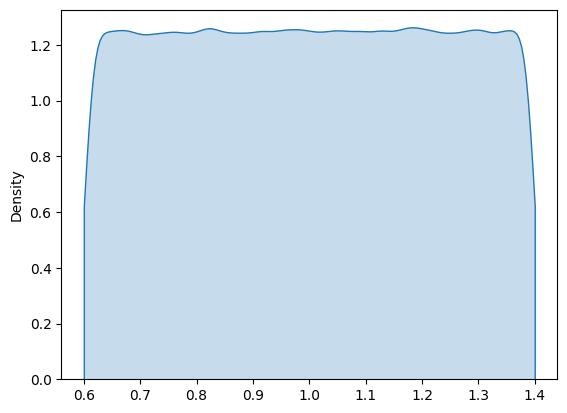

In [23]:
seaborn.kdeplot(
    noise.draw_samples(NUM_OBSERVATIONS),
    fill=True,
    clip=(noise.low, noise.high),
)

<Axes: >

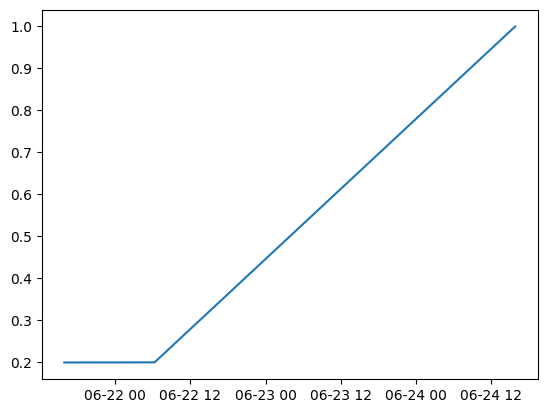

In [24]:
seaborn.lineplot(
    x=observations,
    y=[decay(obs, REFERENCE_DATETIME) for obs in observations],
)